<a href="https://colab.research.google.com/github/WhosLupe/THC_MancillaLagunaJorgeGuadalupe/blob/main/71123_MancillaLagunaJorgeGuadalupe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
"""
Ejercicio de clase 7 de noviembre 2023
Autor: Jorge Guadalupe Mancilla Laguna
Nombre del programa: 71123_MancillaLagunaJorgeGuadalupe.ipynb
"""
import pandas as pd
import matplotlib.pyplot as plt

link='https://github.com/seismomat/HerramientasComputacionales/blob/main/Aplicaciones/ebola_outbreak_dataset-master/ebola_outbreak_dataset-master/ebola_2014_2016_clean.csv'
code='?raw=true'
url=link+code
df = pd.read_csv(url,sep=',', index_col=1)
df

,Country,No. of confirmed cases,No. of confirmed deaths
Date,,,
2014-08-29,Guinea,482.0,287.0
2014-08-29,Nigeria,15.0,6.0
2014-08-29,Sierra Leone,935.0,380.0
2014-08-29,Liberia,322.0,225.0
2014-09-05,Guinea,604.0,362.0
...,...,...,...
2016-03-23,Liberia,3151.0,NaN
2016-03-23,Italy,1.0,NaN
2016-03-23,Liberia,2.0,1.0


In [2]:
df.shape

(2484, 3)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2484 entries, 2014-08-29 to 2016-03-23
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  2484 non-null   object 
 1   No. of confirmed cases   2484 non-null   float64
 2   No. of confirmed deaths  1648 non-null   float64
dtypes: float64(2), object(1)
memory usage: 77.6+ KB


In [4]:
df.isnull().sum()

Country                      0
No. of confirmed cases       0
No. of confirmed deaths    836
dtype: int64

In [5]:
df['Country']

Date
2014-08-29                      Guinea
2014-08-29                     Nigeria
2014-08-29                Sierra Leone
2014-08-29                     Liberia
2014-09-05                      Guinea
                        ...           
2016-03-23                     Liberia
2016-03-23                       Italy
2016-03-23                     Liberia
2016-03-23                     Nigeria
2016-03-23    United States of America
Name: Country, Length: 2484, dtype: object

In [6]:
df['Country'].isin(['Mexico']).sum()

0

In [7]:
df['Country']=='Sierra Leone'

Date
2014-08-29    False
2014-08-29    False
2014-08-29     True
2014-08-29    False
2014-09-05    False
              ...  
2016-03-23    False
2016-03-23    False
2016-03-23    False
2016-03-23    False
2016-03-23    False
Name: Country, Length: 2484, dtype: bool

In [8]:
SL=df[df['Country']=='Sierra Leone']

In [9]:
SL=SL.drop('Country',axis=1)

In [10]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths
Date,,
2014-08-29,935.0,380.0
2014-09-05,1146.0,443.0
2014-09-08,1234.0,461.0
2014-09-12,1287.0,478.0
2014-09-16,1464.0,514.0


In [11]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    2
dtype: int64

In [12]:
SL.shape

(259, 2)

In [13]:
SL.fillna(0.0,inplace=True)

In [14]:
SL.isnull().sum()

No. of confirmed cases     0
No. of confirmed deaths    0
dtype: int64

In [15]:
SL['No. of confirmed deaths'].mean()

3081.019305019305

In [16]:
SL['No. of confirmed cases'].mean()

7883.671814671815

In [17]:
Dates=SL.index[0:-1:10]
NCC=SL['No. of confirmed cases'][0:-1:10]
NCD=SL['No. of confirmed deaths'][0:-1:10]

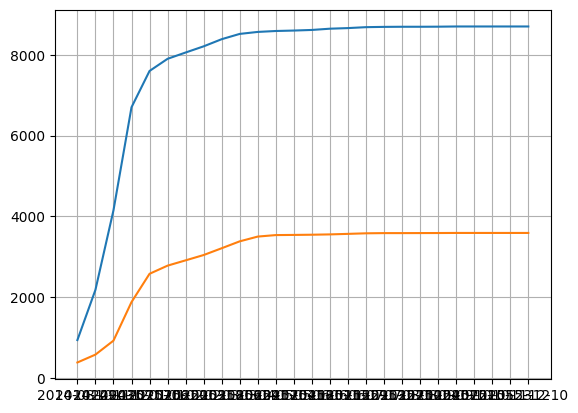

In [18]:
plt.plot(Dates,NCC)
plt.plot(Dates,NCD)
plt.grid()
plt.show()

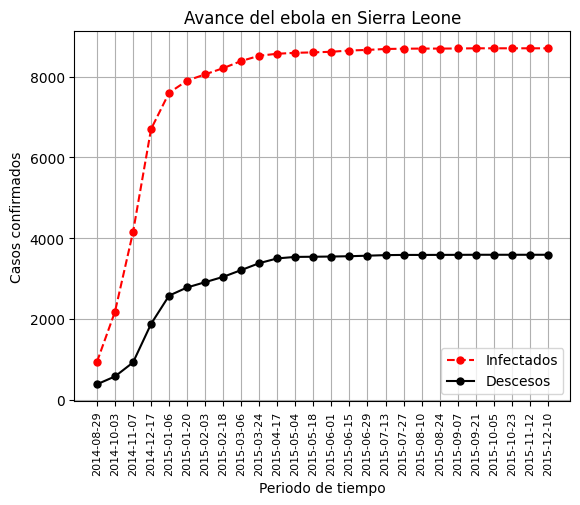

In [20]:
plt.plot(Dates,NCC,'o--r',ms=5, label='Infectados')
plt.plot(Dates,NCD,'o-k',ms=5, label='Descesos')
plt.grid()
plt.title('Avance del ebola en Sierra Leone')
plt.ylabel('Casos confirmados')
plt.xlabel('Periodo de tiempo')
plt.xticks(rotation=90,fontsize=8)
plt.legend()
plt.show()

In [23]:
PIvsD=100*SL['No. of confirmed deaths']/SL['No. of confirmed cases']
SL['PIvsD']=PIvsD
SL

,No. of confirmed cases,No. of confirmed deaths,PIvsD
Date,,,
2014-08-29,935.0,380.0,40.641711
2014-09-05,1146.0,443.0,38.656195
2014-09-08,1234.0,461.0,37.358185
2014-09-12,1287.0,478.0,37.140637
2014-09-16,1464.0,514.0,35.109290
...,...,...,...
2015-12-17,8704.0,3589.0,41.233915
2015-12-22,8704.0,3589.0,41.233915
2015-12-23,8704.0,3589.0,41.233915


In [24]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,PIvsD
Date,,,
2014-08-29,935.0,380.0,40.641711
2014-09-05,1146.0,443.0,38.656195
2014-09-08,1234.0,461.0,37.358185
2014-09-12,1287.0,478.0,37.140637
2014-09-16,1464.0,514.0,35.109290


In [27]:
recuperados=((100-PIvsD)/100)*SL['No. of confirmed cases']
SL['recuperados']=recuperados

In [28]:
SL.head()

,No. of confirmed cases,No. of confirmed deaths,PIvsD,recuperados
Date,,,,
2014-08-29,935.0,380.0,40.641711,555.0
2014-09-05,1146.0,443.0,38.656195,703.0
2014-09-08,1234.0,461.0,37.358185,773.0
2014-09-12,1287.0,478.0,37.140637,809.0
2014-09-16,1464.0,514.0,35.109290,950.0
